# Objective
Perform sentiment analysis on a social media dataset (e.g., HateSpeech on Twitter data) and interpret the results.

## Instructions

1. Collect or use the assigned HateSpeechKe dataset (Find Attached. Please DO NOT DISTRIBUTE the file)

2. Preprocess the data by removing noise (URLs, special characters, etc.) and perform tokenization.

3. Use a library (e.g., NLTK VADER or a pre-trained sentiment model) to analyze sentiment.

4. Calculate sentiment distribution across positive, negative, and neutral sentiments.

5. Interpret the results by discussing trends, patterns, and potential biases.

# 1. Collect or use the assigned HateSpeechKe dataset (Find Attached. Please DO NOT DISTRIBUTE the file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/NLP/task 3/Wote12024NLP.csv"

data = pd.read_csv(path, sep=';,', quotechar = "'", encoding = "utf-8")
data.head()

<ipython-input-37-6c5fdc6ca8b7>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(path, sep=';,', quotechar = "'", encoding = "utf-8")


,tweet
0,""";2017-10-18 11:04;0;0;""""That #ShangweVedio sh..."
1,""";2017-10-18 09:15;0;1;""""they wrote letters to..."
2,""";2017-10-18 09:06;0;2;""""Akombe was a nasa mol..."
3,""";2017-10-04 12:24;0;0;""""@paulinenjoroge @OleI..."
4,""";2017-09-25 20:20;0;0;""""#akombemustgo"""";;;#ak..."


In [ ]:
data.tail()

,tweet
155239,""";2017-08-08 10:50;2;7;""""Haha this hashtag is ..."
155240,""";2017-08-08 10:36;0;1;""""Kikuyus dont even lov..."
155241,""";2017-08-08 08:59;3;2;""""Me I have lived with ..."
155242,""";2017-08-08 06:25;0;1;""""When other tribes are..."
155243,""";2017-08-08 05:27;0;0;""""""""The past few days I..."


In [ ]:
data.columns

Index(['tweet'], dtype='object')

# 2. Preprocess the data by removing noise (URLs, special characters, etc.) and perform tokenization.

In [ ]:
data.iloc[0,0]

'";2017-10-18 11:04;0;0;""That #ShangweVedio should be replaced. Where did #AkombeMustGo disappeared?"";;;#ShangweVedio #AkombeMustGo;""920561132846374912"";https://twitter.com/GordonOka/status/920561132846374912        "'

In [ ]:
def semi_colon_count(sentence):
  return sentence.count(';')


In [ ]:
data['colon_count'] = data['tweet'].apply(semi_colon_count)

data.colon_count.unique()

array([ 9, 10, 11,  4, 13, 12, 14, 15, 18, 23,  0, 19, 17,  8,  5])

There are different number of semicolons within the `tweets`.

There are 15 different types of the datasets.

# Create the Datasets

In [ ]:
def create_dfs_based_on_count(data, column_name, counts):
  '''
  create_dfs_based_on_count - Creates a dictionary to store the dataframes

  Input:
        data - a dataframe with different colon counts
        column_name - the column with the actual colon counts
        counts - an array of unique colon counts
  Output:
        a Dictionary of dataframes
  '''
  dfs = {}

  for count in counts:
      dfs[f'df_{count}'] = data.loc[data[column_name] == count]

  return dfs

In [ ]:
colon_counts = list(data.colon_count.unique())
colon_counts

[9, 10, 11, 4, 13, 12, 14, 15, 18, 23, 0, 19, 17, 8, 5]

In [ ]:
varying_colon_count_df = create_dfs_based_on_count(data, 'colon_count', colon_counts)
len(varying_colon_count_df)

15

### split the individual tweets to specific columns

This was chosen because individual sentences appear like
```
'";2017-10-18 11:04;0;0;""That #ShangweVedio should be replaced. Where did #AkombeMustGo disappeared?"";;;#ShangweVedio #AkombeMustGo;""920561132846374912"";https://twitter.com/GordonOka/status/920561132846374912        "'
```

The semi-colons may indicate that the data in the column name `tweets` can be divided to appear in the form

|tweets|x|y|tweet|||hashtag|tweet_id|url|
|:----|:----|:----|:----|:----|:----|:----|:----:|:----|
|2017-10-18 11:04|0|0|"That #ShangweVedio should be replaced. Where did #AkombeMustGo disappeared?"|||#ShangweVedio #AkombeMustGo|920561132846374912|https://twitter.com/GordonOka/status/920561132846374912|

In [ ]:
import numpy as np
def split_tweets_into_columns(df):
  '''
  split_tweets_into_columns - Splits the 'tweets' column into multiple columns
                              by semicolon turns the splits into separate
                              columns and sets all empty strings to np.nan to
                              handle missing values
  '''
  df_expanded = df['tweet'].str.split(';', expand=True)

  # because replace may be depricated in the future ... prevent downcast
  pd.set_option('future.no_silent_downcasting', True)
  df_expanded.replace('', np.nan, inplace=True)
  df_expanded = df_expanded.map(lambda x: x.strip('"') if isinstance(x, str) else x)

  return df_expanded


In [ ]:
def apply_function_on_dictionary(dfs, function):
  modified_df = {}

  for key, dataframe in dfs.items():
    modified_df[key] = function(dataframe)

  return modified_df


In [ ]:
df_expanded = apply_function_on_dictionary(varying_colon_count_df, split_tweets_into_columns)
df_expanded['df_4']

,0,1,2,3,4
1600,,2017-11-22 21:09,0,0,CS's Wario Waghungu Wamalwa Kaimenyi Matiangi ...
1897,,2016-03-20 08:55,0,0,@ekisiangani NB:Omamo Amina Wario Wamalwa Bala...
1936,,2015-10-24 22:12,0,0,This tweet is to Kikuyus Luos Kalenjins Kamb...
2100,,2014-06-09 01:33,0,0,@moha_reds I didnt know ngilu balala amina ...
2307,,2017-10-10 09:18,0,1,Uhuruto has number in every region Somalis k...
...,...,...,...,...,...
148943,,2017-10-23 11:30,0,0,luhyas luos kissi's kambas mijikendas turk...
151926,,2017-10-08 06:45,1,0,Chief of general staff CBK gov NISI IG KRA Saf...
152658,,2017-09-28 00:33,0,1,Raila should keep off Safaricom Uhuru Ruto Che...
153835,,2017-09-19 13:55,1,0,Yup Cambridge Analytica hacked the servers & ...


# View All the DataFrames

This will help flag the issues with the data in `column 4` which is the target data for tweets

In [ ]:
tweet_dfs = colon_counts
tweet_dfs.sort()
tweet_dfs = [f'df_{i}' for i in tweet_dfs]
tweet_dfs

['df_0',
 'df_4',
 'df_5',
 'df_8',
 'df_9',
 'df_10',
 'df_11',
 'df_12',
 'df_13',
 'df_14',
 'df_15',
 'df_17',
 'df_18',
 'df_19',
 'df_23']

In [ ]:
# import time
for df in tweet_dfs[1:]:
  print(f'\n\n{df}\n')
  print(df_expanded[df].iloc[:,4])




df_4

1600      CS's Wario Waghungu Wamalwa Kaimenyi Matiangi ...
1897      @ekisiangani NB:Omamo Amina Wario Wamalwa Bala...
1936      This tweet is to Kikuyus Luos  Kalenjins  Kamb...
2100      @moha_reds I didnt know ngilu  balala  amina  ...
2307      Uhuruto has number in every region  Somalis  k...
                                ...                        
148943    luhyas  luos  kissi's kambas  mijikendas  turk...
151926    Chief of general staff CBK gov NISI IG KRA Saf...
152658    Raila should keep off Safaricom Uhuru Ruto Che...
153835    Yup  Cambridge Analytica hacked the servers & ...
153929    By 2 you mean Kikuyus   Kalenjins  Masaai  Mer...
Name: 4, Length: 117, dtype: object


df_5

139794    All Kikuyus who are revered today ""argued ove...
Name: 4, dtype: object


df_8

117861   NaN
Name: 4, dtype: float64


df_9

0         That #ShangweVedio should be replaced. Where d...
1         they wrote letters to iebc their bloggers tren...
2         Akombe was a nasa mole

# There are base problem datasets

I selected column `4` for all datasets with more than 4 columns. They appear to have the twitter data.

## Initial Observation

1. dataset `df_8` has value **NAN**
2. dataset `df_23` has a language identifier *this is an identifier for the  languages used on X*

### Investigating the anomalies

In [ ]:
df_expanded['df_8'].index.values.astype(int)[0]

117861

# df_8

The tweets are on `column 4` identified by number `3`

In [ ]:
df_expanded['df_23']

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
73828,,2011-10-14 19:17,0,0,Luganda,NaN,Ki Kati. Luxembourgish,NaN,Moiën. Maasai,NaN,...,Bonju. Manchu,NaN,Ei. Mandarin,NaN,Nî Hâo .,NaN,NaN,NaN,124881426591129600,https://twitter.com/canadasavior/status/124881...
74184,,2011-10-14 19:17,0,0,Luganda,NaN,Ki Kati. Luxembourgish,NaN,Moiën. Maasai,NaN,...,Bonju. Manchu,NaN,Ei. Mandarin,NaN,Nî Hâo .,NaN,NaN,NaN,124881426591129600,https://twitter.com/canadasavior/status/124881...


# df_23

hypothesized values

|Problem Column| target column | Current Value (language value)|expected Value|
|:----:|:----:|:----|:----|
|4|6|Luganda| Ki Kati|
|4|6, 14|Luxembourgish|Moiën Bonju|
|8|14, 16| Maasai| Manchu Ei|
|16| 18| Mandarin| Nî Hâo|

In [ ]:
def numbers_to_alphabets(numbers):
  '''
  numbers_to_alphabets - takes a list of numbers and returns its alphabetic
                         equivalent.
  '''
  alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
  return [alphabet[number] for number in numbers if number < len(alphabet)]

In [ ]:
numbers_to_alphabets([1, 2, 3, 4])

['B', 'C', 'D', 'E']

# I will not consider df_23 in my model creation

it only contains `2 rows` they are not coherent

In [ ]:
df_expanded.keys()

dict_keys(['df_9', 'df_10', 'df_11', 'df_4', 'df_13', 'df_12', 'df_14', 'df_15', 'df_18', 'df_23', 'df_0', 'df_19', 'df_17', 'df_8', 'df_5'])

In [ ]:
# sample code to create the combined dataframe
next_df = pd.DataFrame({
        'index': df_expanded['df_10'].index.values.astype(int),
        'tweet': df_expanded["df_10"].iloc[:, 4]
    })
next_df

,index,tweet
208,208,#AkombeMustGo tag proves how demented its become
390,390,...NASA supporters who are majority wanted a t...
431,431,It is not true that all Jubilee supporters hav...
432,432,"Joshua Kutuny: """"it is not true that all Jubil..."
435,435,It is not true that all Jubilee supporters hav...
...,...,...
154425,154425,Chama cha wakabila
154488,154488,True to the letter! It was expected of Njue fr...
154559,154559,Why do they bring a rally in Nairobi to addres...
154560,154560,Why do they bring a rally in Nairobi to addres...


In [ ]:
tweet_dfs

['df_0',
 'df_4',
 'df_5',
 'df_8',
 'df_9',
 'df_10',
 'df_11',
 'df_12',
 'df_13',
 'df_14',
 'df_15',
 'df_17',
 'df_18',
 'df_19',
 'df_23']

In [ ]:
base_df = pd.DataFrame(columns = ['index', 'tweet'])

# remove df_23 and df_0
for df_key in tweet_dfs[1:14]:
  next_df = pd.DataFrame({
        'index': df_expanded[df_key].index.values.astype(int)[0],
        'tweet': df_expanded[df_key].iloc[:, 4].apply(str)
    })
  base_df = pd.concat([base_df, next_df], ignore_index=True)

base_df = base_df.astype({'index': int, 'tweet': str})
base_df.head()

,index,tweet
0,1600,CS's Wario Waghungu Wamalwa Kaimenyi Matiangi ...
1,1600,@ekisiangani NB:Omamo Amina Wario Wamalwa Bala...
2,1600,This tweet is to Kikuyus Luos Kalenjins Kamb...
3,1600,@moha_reds I didnt know ngilu balala amina ...
4,1600,Uhuruto has number in every region Somalis k...


In [ ]:
base_df.tail()

,index,tweet
154193,34045,OMG EM YOU ARE SERIOUSLY AMAZING!!! Thank you ...
154194,34045,KAMBAS ARE AGENTS OF MISFORTUNE TO KENYA
154195,34045,#Kenyan pres visited his troops at Dhobley in ...
154196,98182,Hawa wajaluo lol no pun intended ths people r ...
154197,98182,Hawa wajaluo lol no pun intended ths people r ...


## b. Perform Tokenization


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
base_df.dtypes

,0
index,int64
tweet,object


In [ ]:
base_df['tokens'] = base_df['tweet'].apply(sent_tokenize)
base_df.tail()

,index,tweet,tokens
154193,34045,OMG EM YOU ARE SERIOUSLY AMAZING!!! Thank you ...,"[OMG EM YOU ARE SERIOUSLY AMAZING!!!, Thank yo..."
154194,34045,KAMBAS ARE AGENTS OF MISFORTUNE TO KENYA,[KAMBAS ARE AGENTS OF MISFORTUNE TO KENYA]
154195,34045,#Kenyan pres visited his troops at Dhobley in ...,[#Kenyan pres visited his troops at Dhobley in...
154196,98182,Hawa wajaluo lol no pun intended ths people r ...,[Hawa wajaluo lol no pun intended ths people r...
154197,98182,Hawa wajaluo lol no pun intended ths people r ...,[Hawa wajaluo lol no pun intended ths people r...


# 3. Use a library (e.g., NLTK VADER or a pre-trained sentiment model) to analyze sentiment.

## Background
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

### What is sentiment analyisis

Sentiment Analysis is the process of `computationally` determining whether a piece of writing is positive, negative or neutral.

> It’s also known as
>
> **opinion mining**

### Why sentiment analysis?


1. Business -- to develop their strategies, to understand customers’ feelings towards products or brand,the response campaigns or product launches and why consumers don’t buy some products.
2. Politics --   used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well! .
3. Public Actions -- used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.


## My choice of Vader models

I will use `vaderSentiment` [from this guide](https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/)


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_scores(sentence):
  '''
  sentiment_scores - a function to calculate sentiment scores for each tweet

  input:
        a sentence
  output:
        1. its negative sentiment value
        2. its neutral sentiment value
        3. its positive sentiment value
        4. its compound sentiment value
        5. The value of if the sentence is 'pos' 'neg' or 'neutral'
  '''
  sentiment_dict = analyzer.polarity_scores(sentence)
  return pd.Series({
      'neg': sentiment_dict['neg'],
      'neu': sentiment_dict['neu'],
      'pos': sentiment_dict['pos'],
      'compound': sentiment_dict['compound'],
      'sentiment': 'Positive' if sentiment_dict['compound'] >= 0.05 else 'Negative' if sentiment_dict['compound'] <= -0.05 else 'Neutral'
      })

In [ ]:
# add the sentiment scores(sent)
# neu - neutral
# pos - positive
# neg - negative
# comp - compound
base_df[['neg_sent', 'neu_sent', 'pos_sent', 'comp_sent', 'sentiment']] = base_df['tweet'].apply(sentiment_scores)
base_df.head()

# 4. Calculate sentiment distribution across positive, negative, and neutral sentiments.

In [ ]:
sent_counts = base_df['sentiment'].value_counts()
sent_df = sent_counts.reset_index()
sent_df.columns = ['Sentiment', 'Counts']
sent_df

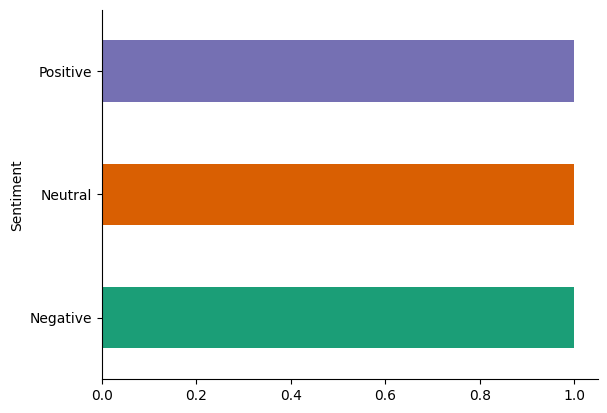

In [ ]:
# bargraphs Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
sent_df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

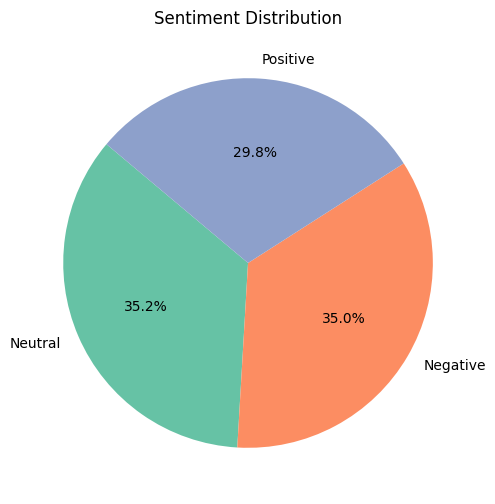

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(sent_df['Counts'], labels=sent_df['Sentiment'], autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution')
plt.show()

# confirming results using nltk vader

This will involve downloading


```python
nltk.download('vader_lexicon')
```

2. Instantiating an analyzer

```python
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# instantiatint the analyzer class
nltk_analyzer = SentimentIntensityAnalyzer()
```

3. Creating the polarity scores

```python
for text in texts:
    scores = nltk_analyzer.polarity_scores(text)
    print(text)
    print(scores)
```

In [ ]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk_analyzer = SentimentIntensityAnalyzer()


def nltk_sent_score(sentence):

    sent_dict = nltk_analyzer.polarity_scores(sentence)
    return pd.Series({
        'neg': sent_dict['neg'],
        'neu': sent_dict['neu'],
        'pos': sent_dict['pos'],
        'compount': sent_dict['compound'],
        'sentiment': 'Positive' if sent_dict['compound'] >= 0.05 else 'Negative' if sent_dict['compound'] <= -0.05 else 'Neutral'
})

In [ ]:
base_df[['nltk_neg', 'nltk_neu', 'nltk_pos', 'nltk_comp', 'nltk_sent']] = base_df['tweet'].apply(nltk_sent_score)

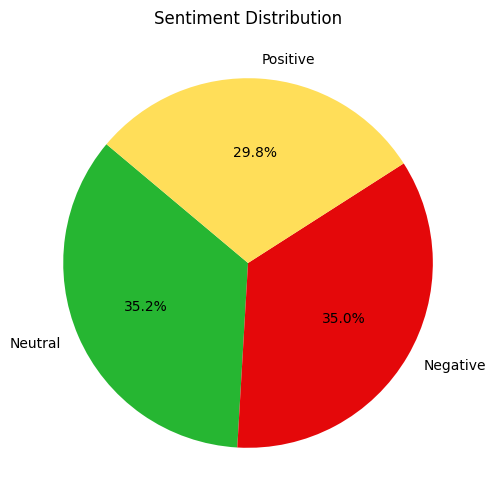

In [ ]:
nltk_sent_counts = base_df['nltk_sent'].value_counts()
nltk_sent_df = sent_counts.reset_index()
nltk_sent_df.columns = ['Sentiment', 'Counts']

plt.figure(figsize=(8, 6))
plt.pie(nltk_sent_df['Counts'], labels=nltk_sent_df['Sentiment'], autopct='%1.1f%%', startangle=140, colors=['#26b632', '#e4080a', '#ffde59'])
plt.title('Sentiment Distribution')
plt.show()

# 5. Interpret the results by discussing trends, patterns, and potential biases.

## Inference
From this data it can be observed that most tweets are neutral. However, during this period there may be a spike in the number of negative sentiment.

This may mean that the data was collected during a particularly volatile time on the internet.

This is backed by the data ranging from 2011-2017. If the data is majorly kenyan this period follows the overlap of

1. The [new constitution](https://www.bbc.com/news/world-africa-11103008)
2. An upsurge in terrorist attacks [2011-2014](https://en.wikipedia.org/wiki/2011%E2%80%932014_terrorist_attacks_in_Kenya)

These may explain the negativity in the tweets.


### Neutral Tweets

because Vader is a rule based model trained on English. all the data that is not English is ranked as neutral. There are also tweets made up of hashtags which when repeated multiple times shift the sentiment values from negative --> neutral or positive --> neutral

these are the main biases from a rule based pre-trained model. The limited corpus used for training also skews the data towards neutrality.